<a href="https://colab.research.google.com/github/SMC-AAU-CPH/ML-For-Beginners/blob/main/2-Regression/4-Logistic/solution/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression - Lesson 4

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data:

In [1]:
try:
  import google.colab
  IN_COLAB = True
  ! mkdir -p ../data
  ! wget https://raw.githubusercontent.com/SMC-AAU-CPH/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv -P ../data
except:
  IN_COLAB = False

--2025-09-09 16:26:52--  https://raw.githubusercontent.com/SMC-AAU-CPH/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172012 (168K) [text/plain]
Saving to: ‘../data/US-pumpkins.csv’

US-pumpkins.csv     100%[===================>] 167.98K  1.03MB/s    in 0.2s    

2025-09-09 16:26:53 (1.03 MB/s) - ‘../data/US-pumpkins.csv’ saved [172012/172012]



In [2]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
# Select the columns we want to use
columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = full_pumpkins.loc[:, columns_to_select]

# Drop rows with missing values
pumpkins.dropna(inplace=True)

pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


# Let's have a look to our data!

By visualising it with Seaborn

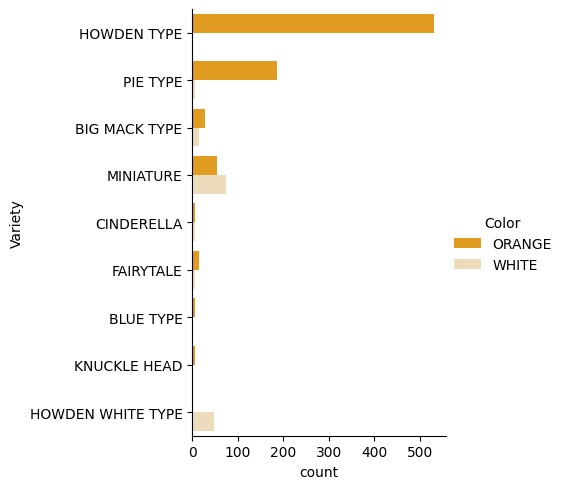

In [4]:
import seaborn as sns
# Specify colors for each values of the hue variable
palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
}
# Plot a bar plot to visualize how many pumpkins of each variety are orange or white
sns.catplot(
    data=pumpkins, y="Variety", hue="Color", kind="count",
    palette=palette,
)

# Data pre-processing

Let's encode features and labels to better plot the data and train the model

In [5]:
# Let's look at the different values of the 'Item Size' column
pumpkins['Item Size'].unique()

array(['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo'],
      dtype=object)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
# Encode the 'Item Size' column using ordinal encoding
item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [7]:
from sklearn.preprocessing import OneHotEncoder
# Encode all the other features using one-hot encoding
categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [8]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('ord', ordinal_encoder, ordinal_features),
     ('cat', categorical_encoder, categorical_features)
     ])
# Get the encoded features as a pandas DataFrame
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)
encoded_features.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.preprocessing import LabelEncoder
# Encode the 'Color' column using label encoding
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])
encoded_pumpkins = encoded_features.assign(Color=encoded_label)
encoded_pumpkins.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
# Let's look at the mapping between the encoded values and the original values
list(label_encoder.inverse_transform([0, 1]))

['ORANGE', 'WHITE']

# Analysing relationships between features and label

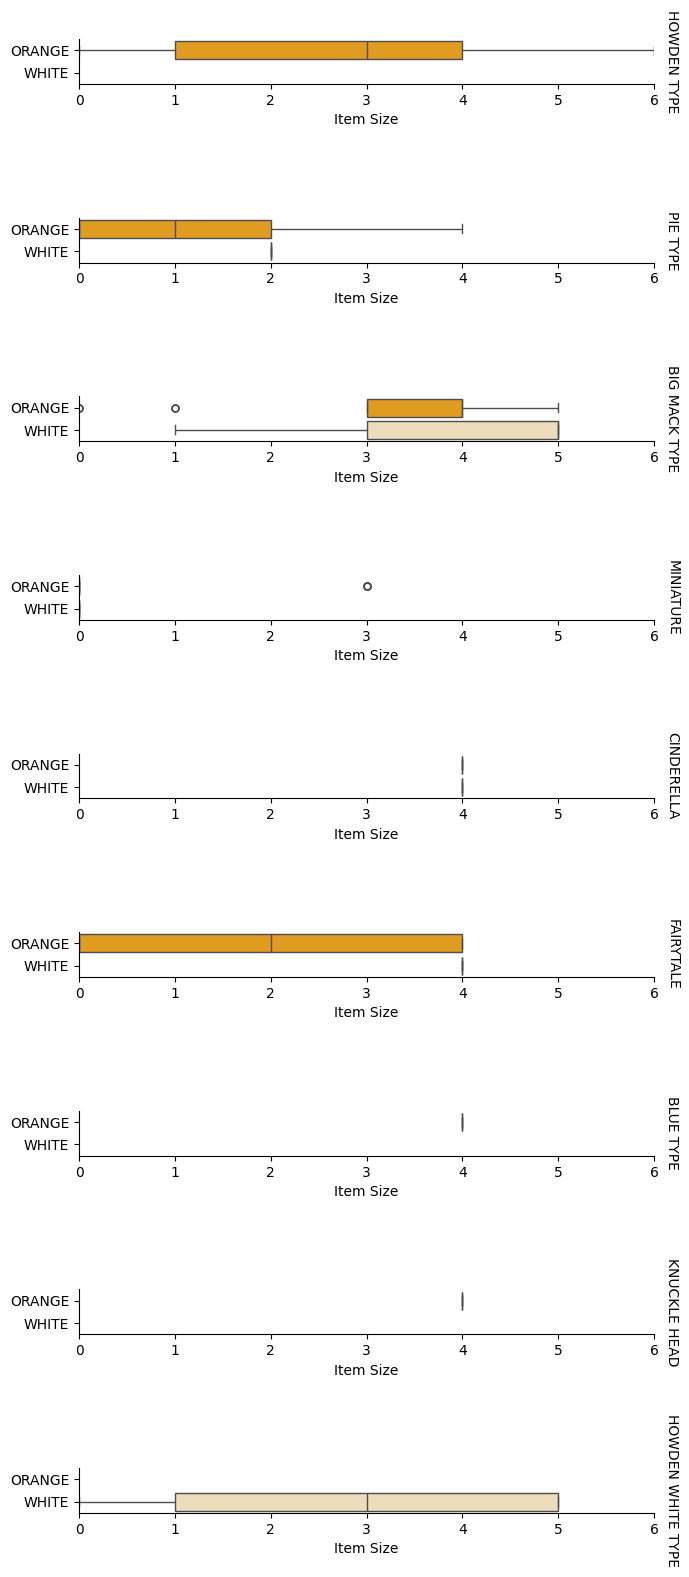

In [11]:
palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
}
# We need the encoded Item Size column to use it as the x-axis values in the plot
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']

g = sns.catplot(
    data=pumpkins,
    x="Item Size", y="Color", row='Variety', hue="Color",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
    # legend=False,            # avoid duplicate legend when hue == y
)
# Defining axis labels
g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")


Let's now focus on a specific relationship: Item Size and Color!

In [19]:
# Suppressing warning message claiming that a portion of points cannot be placed into the plot due to the high number of data points
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

<Axes: xlabel='Color', ylabel='ord__Item Size'>

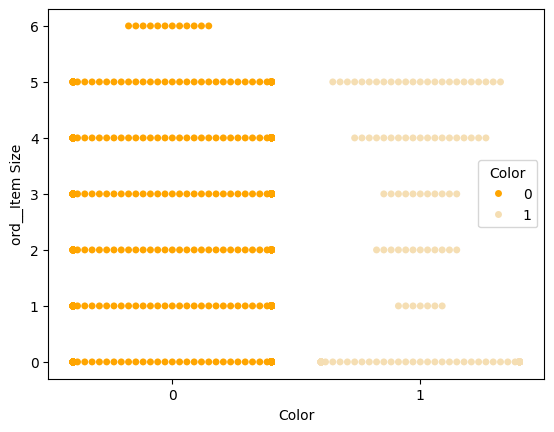

In [20]:

palette = {
    0: 'orange',
    1: 'wheat'
}
sns.swarmplot(x="Color", y="ord__Item Size", hue="Color", data=encoded_pumpkins, palette=palette)

**Watch out**: Ignoring warnings is NOT a best practice and should be avoid, whenever possible. Warnings often contain useful messages that let us improve our code and solve an issue.
The reason why we are ignoring this specific warning is to guarantee the readability of the plot. Plotting all the data points with a reduced marker size, while keeping consistency with the palette color, generates an unclear visualization.

# Build your model

In [21]:
from sklearn.model_selection import train_test_split
# X is the encoded features
X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
# y is the encoded label
y = encoded_pumpkins['Color']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the pumpkin dataset
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model and print the results
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 11,  22]])

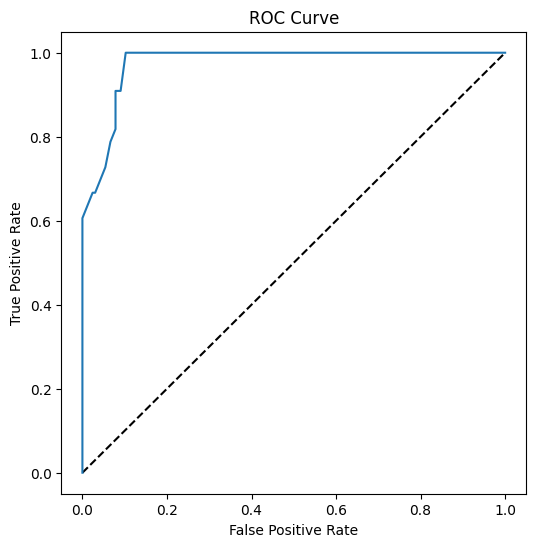

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [18]:
# Calculate AUC score
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9749908725812341
